In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchsummary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

###Dataset


In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Visualize data

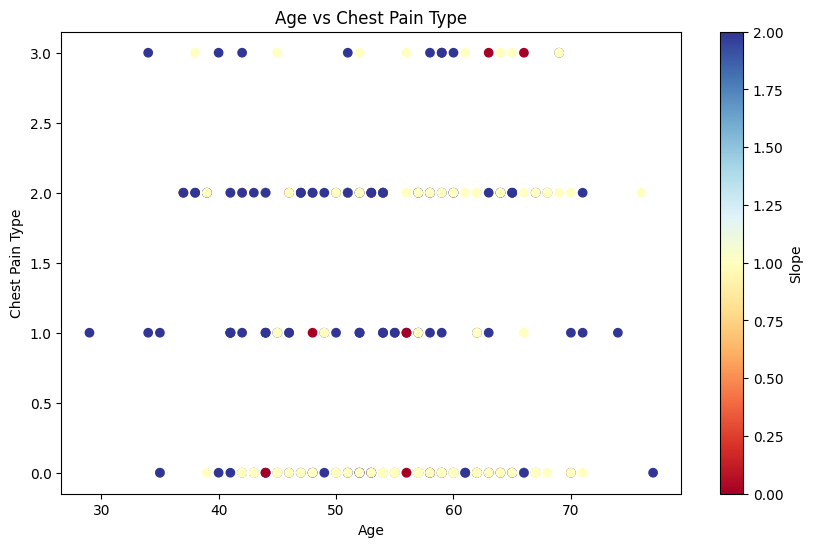

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['age'], dataset['cp'], c=dataset['slp'], cmap=plt.cm.RdYlBu)
plt.colorbar(label='Slope')
plt.title('Age vs Chest Pain Type')
plt.xlabel('Age')
plt.ylabel('Chest Pain Type')
plt.show()

###Covert data to numpy Arrays

In [4]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X_array = dataset.iloc[:, :-1].values
y_array = dataset.iloc[:, -1].values

In [6]:
X_array[:10], y_array[:10]

(array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
           2.3,   0. ,   0. ,   1. ],
        [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
           3.5,   0. ,   0. ,   2. ],
        [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
           1.4,   2. ,   0. ,   2. ],
        [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
           0.8,   2. ,   0. ,   2. ],
        [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
           0.6,   2. ,   0. ,   2. ],
        [ 57. ,   1. ,   0. , 140. , 192. ,   0. ,   1. , 148. ,   0. ,
           0.4,   1. ,   0. ,   1. ],
        [ 56. ,   0. ,   1. , 140. , 294. ,   0. ,   0. , 153. ,   0. ,
           1.3,   1. ,   0. ,   2. ],
        [ 44. ,   1. ,   1. , 120. , 263. ,   0. ,   1. , 173. ,   0. ,
           0. ,   2. ,   0. ,   3. ],
        [ 52. ,   1. ,   2. , 172. , 199. ,   1. ,   1. , 162. ,   0. ,
           0.5,   2. ,   0. ,   3. ],
        [ 

###Convert numpy array to tensors

In [7]:
X = torch.tensor(X_array, dtype=torch.float32)
y = torch.tensor(y_array, dtype=torch.float32)

In [8]:
X[:10], y[:10]

(tensor([[ 63.0000,   1.0000,   3.0000, 145.0000, 233.0000,   1.0000,   0.0000,
          150.0000,   0.0000,   2.3000,   0.0000,   0.0000,   1.0000],
         [ 37.0000,   1.0000,   2.0000, 130.0000, 250.0000,   0.0000,   1.0000,
          187.0000,   0.0000,   3.5000,   0.0000,   0.0000,   2.0000],
         [ 41.0000,   0.0000,   1.0000, 130.0000, 204.0000,   0.0000,   0.0000,
          172.0000,   0.0000,   1.4000,   2.0000,   0.0000,   2.0000],
         [ 56.0000,   1.0000,   1.0000, 120.0000, 236.0000,   0.0000,   1.0000,
          178.0000,   0.0000,   0.8000,   2.0000,   0.0000,   2.0000],
         [ 57.0000,   0.0000,   0.0000, 120.0000, 354.0000,   0.0000,   1.0000,
          163.0000,   1.0000,   0.6000,   2.0000,   0.0000,   2.0000],
         [ 57.0000,   1.0000,   0.0000, 140.0000, 192.0000,   0.0000,   1.0000,
          148.0000,   0.0000,   0.4000,   1.0000,   0.0000,   1.0000],
         [ 56.0000,   0.0000,   1.0000, 140.0000, 294.0000,   0.0000,   0.0000,
          153.

###check the input output shapes

In [9]:
X.shape, y.shape

(torch.Size([303, 13]), torch.Size([303]))

###split train and test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

###build model

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(13, 100)
    self.layer2 = nn.Linear(100, 100)
    self.layer3 = nn.Linear(100, 100)
    self.layer4 = nn.Linear(100, 50)
    self.layer5 = nn.Linear(50, 1)

  def forward(self, x):
    return self.layer5(self.layer4(self.layer3(self.layer2(self.layer1(x)))))

model = model().to(device)

##Model summary

In [14]:
modelsummary = torchsummary.summary(model, (1, 13))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           1,400
            Linear-2               [-1, 1, 100]          10,100
            Linear-3               [-1, 1, 100]          10,100
            Linear-4                [-1, 1, 50]           5,050
            Linear-5                 [-1, 1, 1]              51
Total params: 26,701
Trainable params: 26,701
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.10
Estimated Total Size (MB): 0.10
----------------------------------------------------------------


###loss fumction and optimizer

In [15]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [16]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

###**training** loop

In [17]:
epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  #training
  model.train()

  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #tesing
  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)


  if epoch % 10 == 0:
    print(f"epoch: {epoch} | training:- loss: {loss}  acc: {acc} | testing:- loss: {test_loss}  acc: {test_acc} ")

epoch: 0 | training:- loss: 1.6796009540557861  acc: 54.958677685950406 | testing:- loss: 15.682374954223633  acc: 47.540983606557376 
epoch: 10 | training:- loss: 2.3331313133239746  acc: 45.04132231404959 | testing:- loss: 0.9692118167877197  acc: 47.540983606557376 
epoch: 20 | training:- loss: 1.032047986984253  acc: 45.04132231404959 | testing:- loss: 0.8130718469619751  acc: 47.540983606557376 
epoch: 30 | training:- loss: 0.6234347224235535  acc: 62.8099173553719 | testing:- loss: 0.5621852874755859  acc: 77.04918032786885 
epoch: 40 | training:- loss: 0.6200544834136963  acc: 63.22314049586777 | testing:- loss: 0.5660672187805176  acc: 63.934426229508205 
epoch: 50 | training:- loss: 0.612453818321228  acc: 66.94214876033058 | testing:- loss: 0.5378983616828918  acc: 77.04918032786885 
epoch: 60 | training:- loss: 0.6013790965080261  acc: 64.46280991735537 | testing:- loss: 0.5166788101196289  acc: 77.04918032786885 
epoch: 70 | training:- loss: 0.5922150611877441  acc: 69.8347

###save model

In [20]:
modelfilename = "model"
torch.save(obj=model.state_dict(), f=modelfilename)